In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet




from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

Load the Dataset

In [3]:
data = pd.read_csv('temperature_data.csv')
data.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


Basic data Exploration

In [4]:
data.shape

(998070, 13)

In [5]:
# Check the data types of each types of each column
data.dtypes


ambient           float64
coolant           float64
u_d               float64
u_q               float64
motor_speed       float64
torque            float64
i_d               float64
i_q               float64
pm                float64
stator_yoke       float64
stator_tooth      float64
stator_winding    float64
profile_id          int64
dtype: object

In [6]:
# Check for missing values 
data.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [8]:
data.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,-0.004396,0.000609,-0.002208,-0.003935,50.732001
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,0.995686,1.001049,0.999597,0.998343,22.073125
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.672308,-0.747265,-0.761951,-0.725622,32.000000
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,0.094367,-0.057226,0.005085,0.006536,56.000000
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.680691,0.697344,0.772239,0.725660,68.000000
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781,81.000000


In [9]:
data.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding',
       'profile_id'],
      dtype='object')

Data Visualizations

In [10]:
data['pm'].mean()

-0.004395794658386597

<AxesSubplot:xlabel='pm', ylabel='Density'>

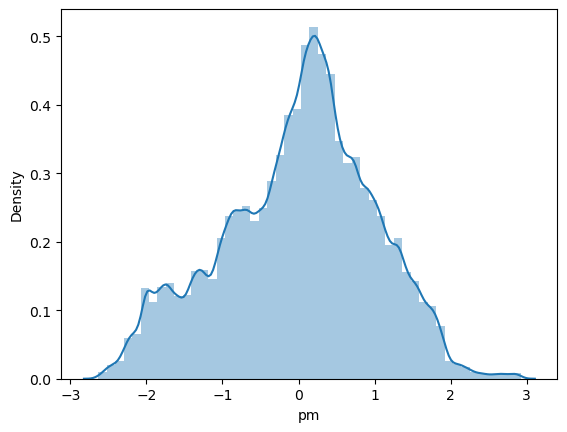

In [11]:
sns.distplot(data['pm'])

In [12]:
data['stator_yoke'].mean()

0.0006091402995146254

<AxesSubplot:xlabel='stator_yoke', ylabel='Density'>

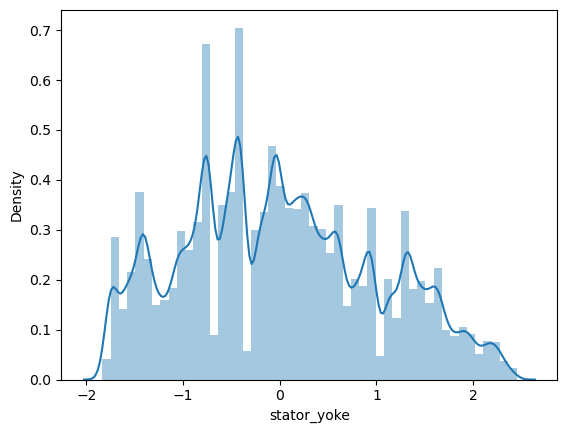

In [13]:
sns.distplot(data['stator_yoke'])

In [14]:
data['stator_tooth'].mean()

-0.002207737720118494

<AxesSubplot:xlabel='stator_tooth', ylabel='Density'>

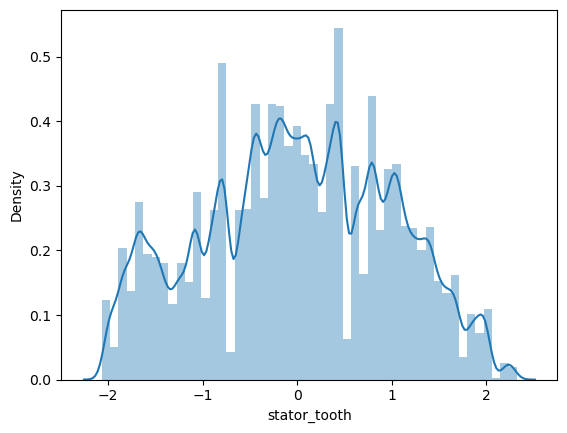

In [15]:
sns.distplot(data['stator_tooth'])

EDA

Correlation Matrix

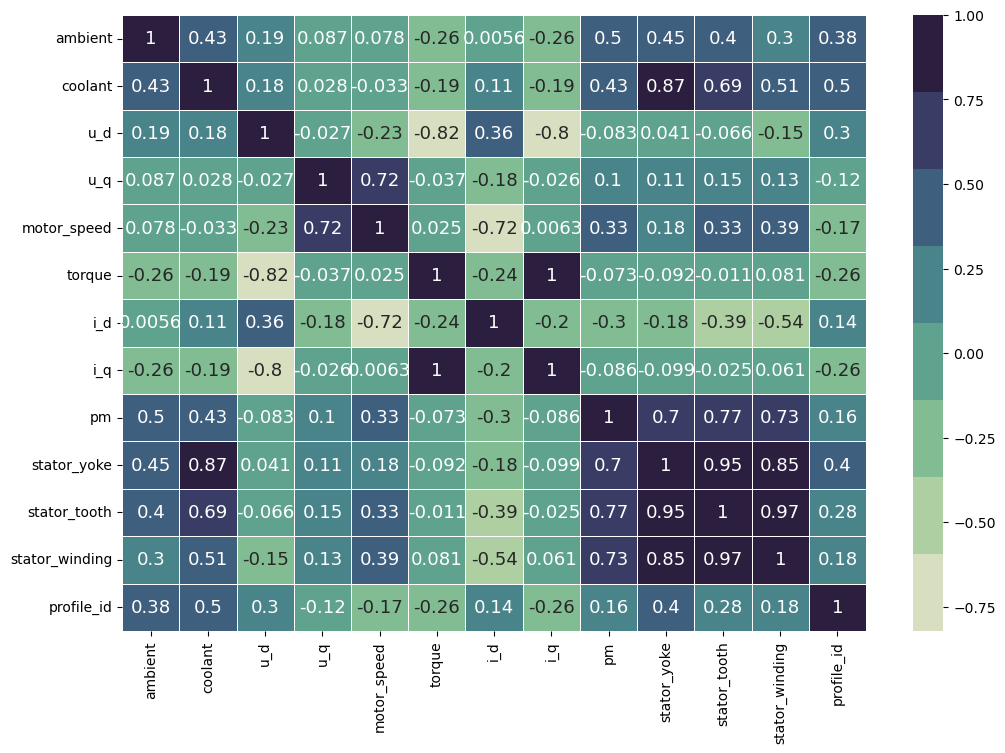

In [16]:
# checking the correlation (Pearson's coeff)
corr_matrix = data.corr()
f,ax  = plt.subplots(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True,linewidths=.5,annot_kws={"size": 13}, ax=ax, cmap = sns.cubehelix_palette(8, start=.5, rot=-.75))
plt.show()

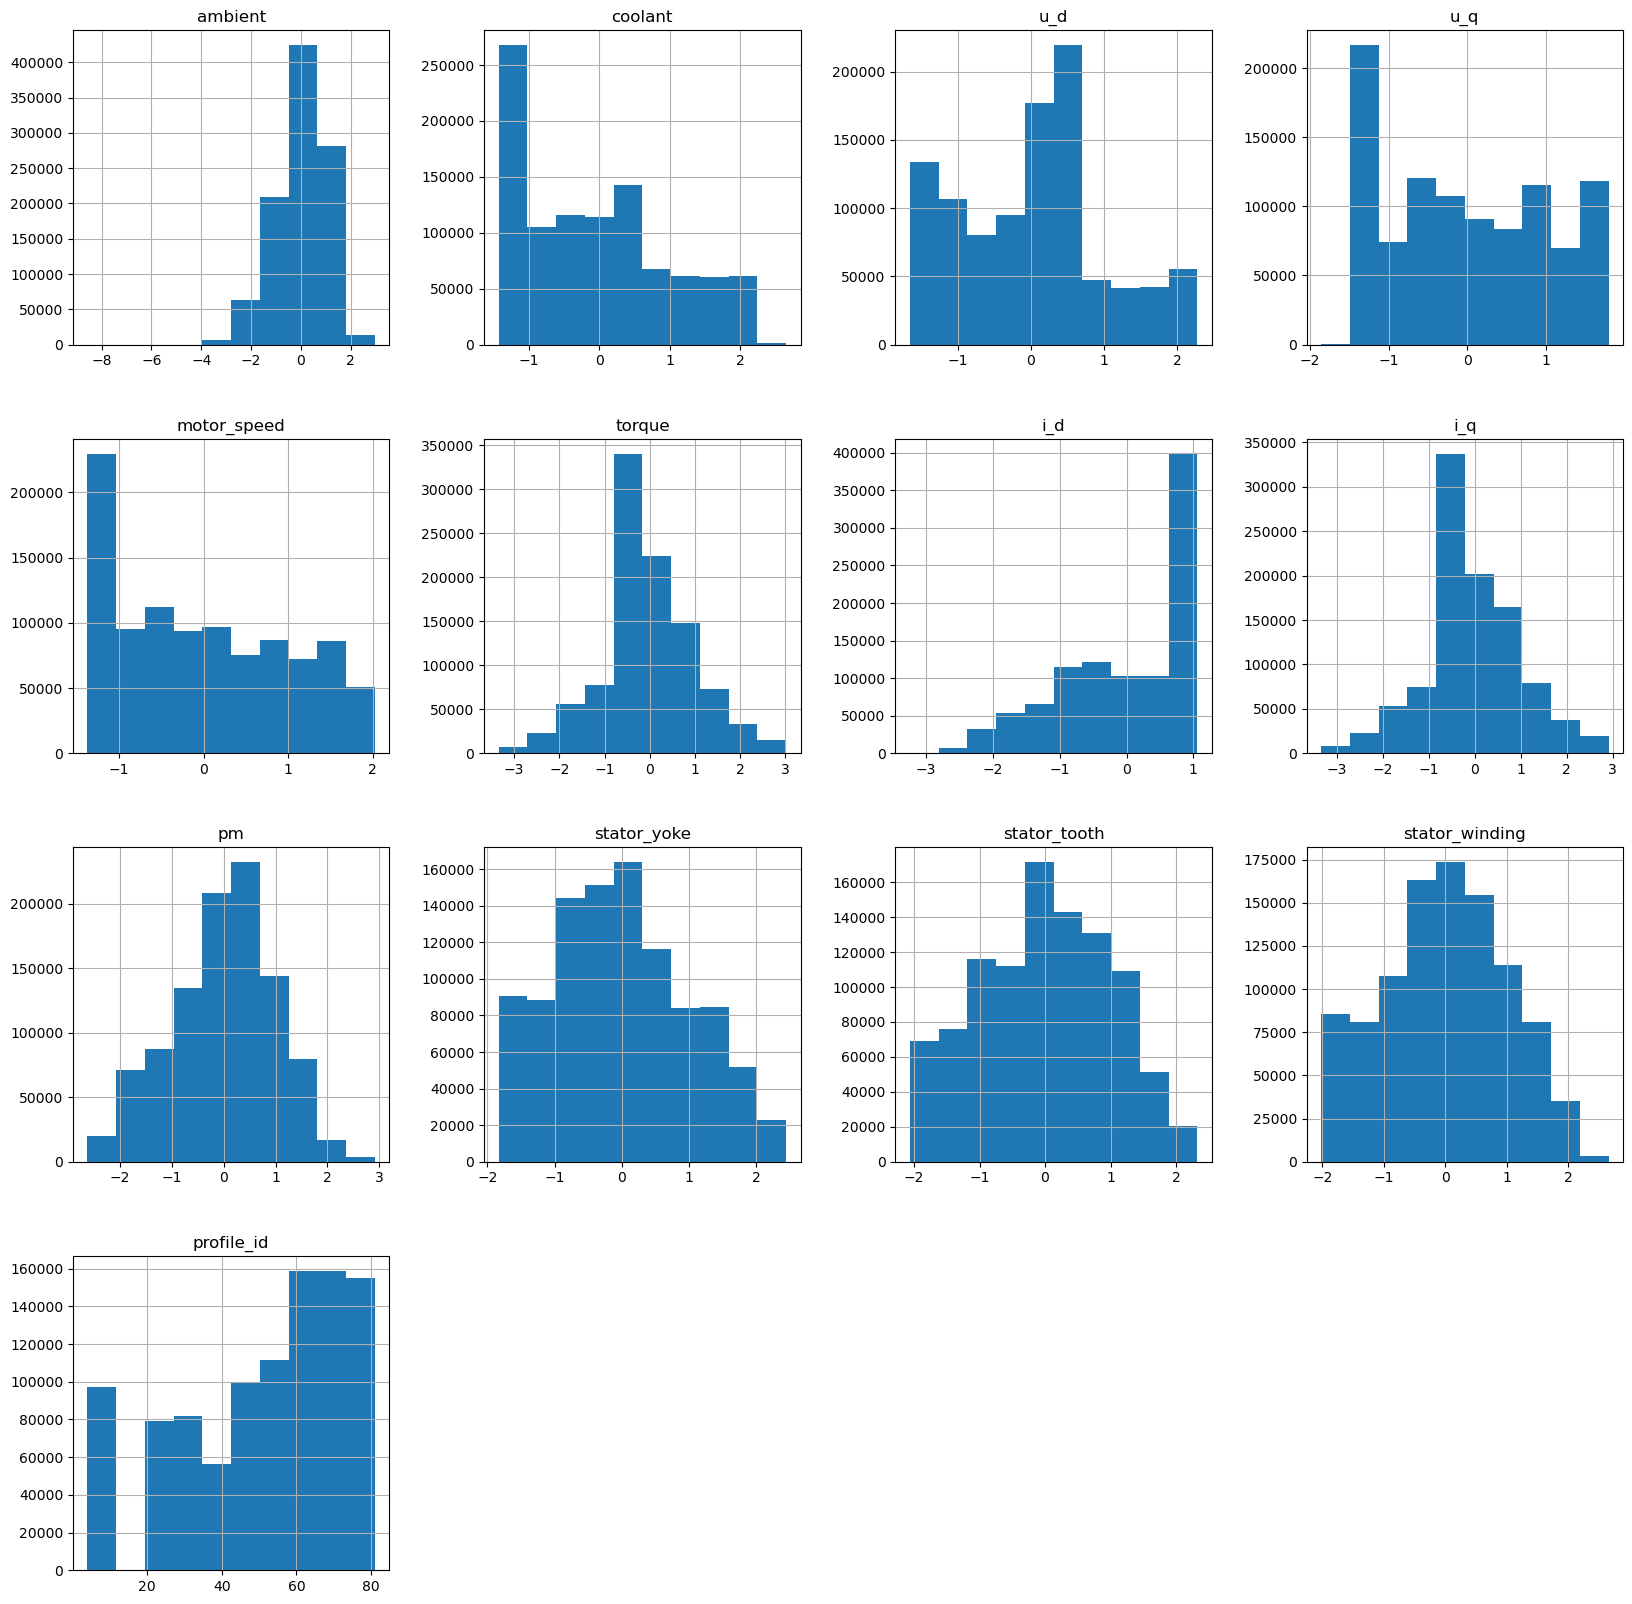

In [17]:
# Histogram to check the data is normally distributed
data.hist(figsize= (20,20))
plt.show()


In [18]:
# Linear correlation for 'pm' target

cpm = corr_matrix['pm'].sort_values(ascending= False)
print('correlation for ')
cpm[cpm >= 0.5] # for medium or high linear correlation

correlation for 


pm                1.000000
stator_tooth      0.768352
stator_winding    0.729561
stator_yoke       0.695014
ambient           0.501496
Name: pm, dtype: float64

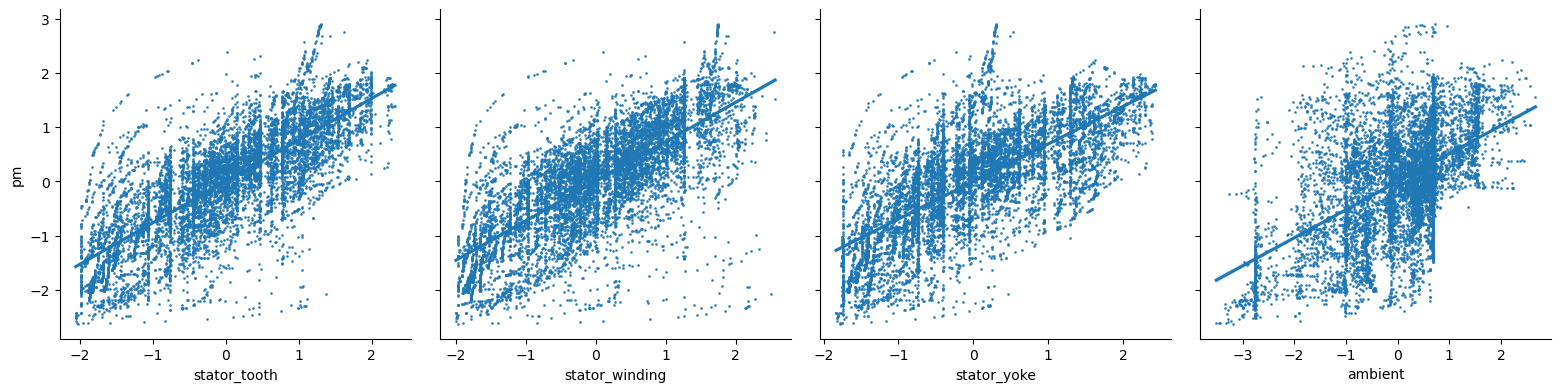

In [19]:
g = sns.PairGrid(data.sample(frac=0.01), y_vars=["pm"],
                 x_vars=["stator_tooth", "stator_winding", "stator_yoke", "ambient"], height=4, palette="GnBu_d")

g.map(sns.regplot, scatter_kws={'s':1});

In [20]:
column = ['stator_touth','stator_winding','stator_yoke','ambient']

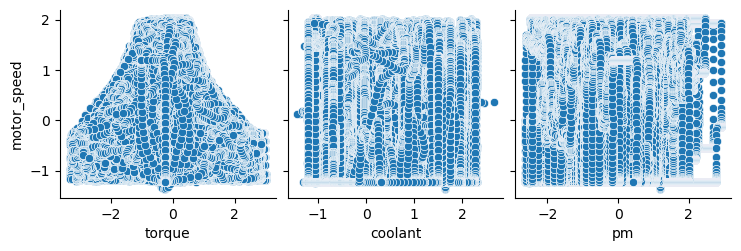

In [21]:
# Scatter plot between motor speed and other attributes
sns.pairplot(data, x_vars=['torque', 'coolant', 'pm'], y_vars='motor_speed', kind='scatter')
plt.show()

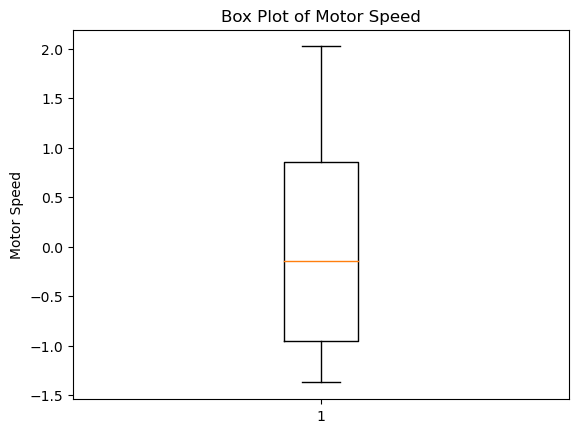

In [22]:
# Create a box plot to visualize the distribution of motor speed
plt.boxplot(data['motor_speed'])
plt.ylabel('Motor Speed')
plt.title('Box Plot of Motor Speed')
plt.show()

ValueError: num must be 1 <= num <= 12, not 13

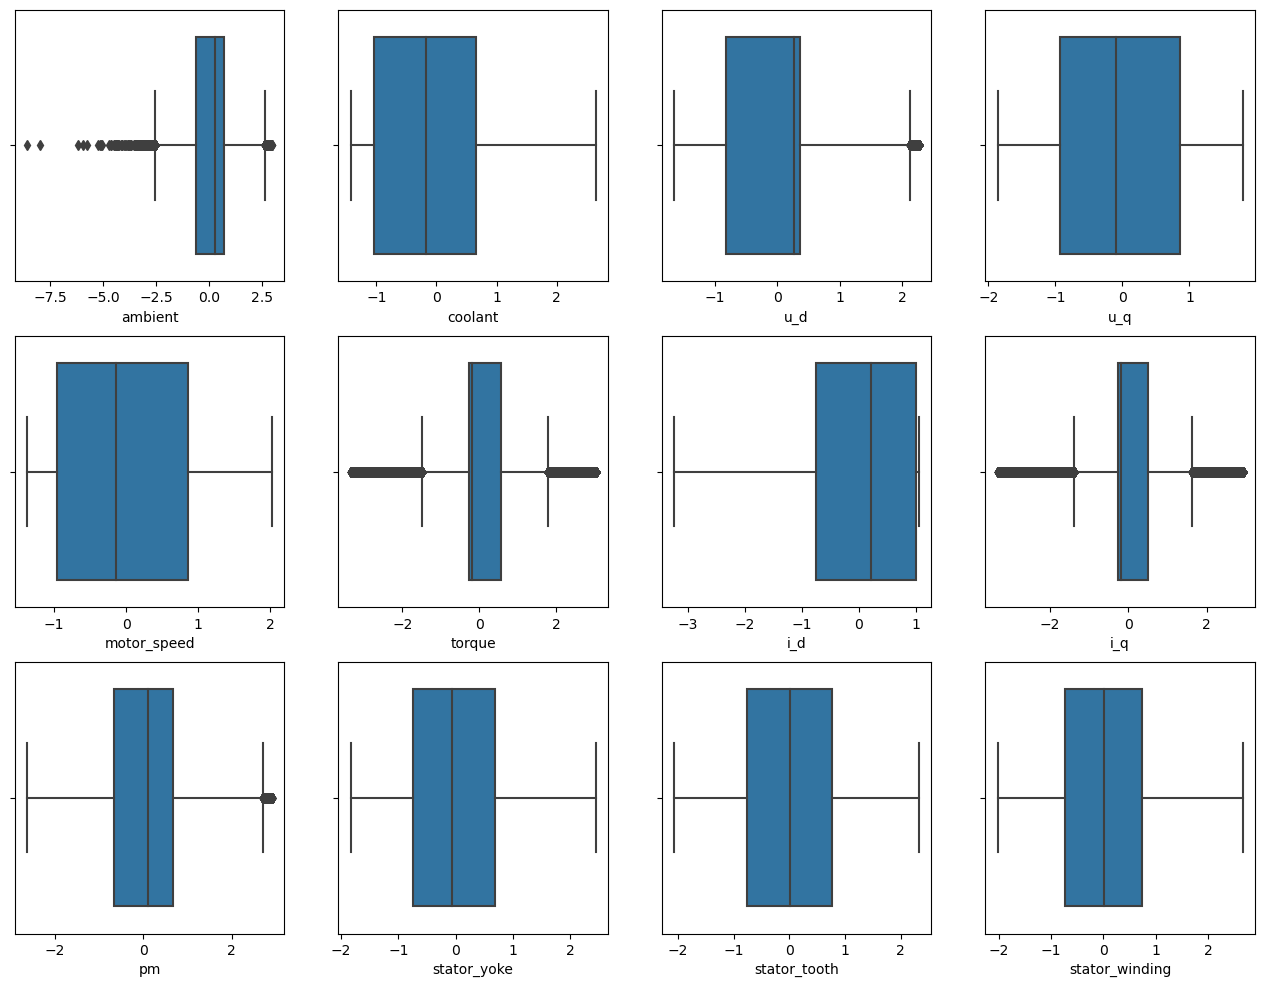

In [23]:
plt.figure(figsize=(16,12))
for i in range(len(data.columns)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data[data.columns[i]])
plt.show()


In [24]:
X = data.drop(['pm', 'stator_yoke', 'stator_tooth', 'stator_winding', 'torque'],axis=1)
X.shape

(998070, 8)

In [25]:
y = data[['pm', 'stator_yoke', 'stator_tooth', 'stator_winding', 'torque']]
y.shape

(998070, 5)

So Our dataset has multiple tergets(stator_tooth,stator_yoke,stator_winding,pm and torque)

### Train Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, shuffle= True)

In [27]:
cols = X_train.columns

In [28]:
cols

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d', 'i_q',
       'profile_id'],
      dtype='object')

## Feature Scaling StandardScaler

In [29]:
# Scaling the features

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

# fit and transform
X_trains = sc_X.fit_transform(X_train)
X_tests = sc_X.fit_transform(X_test)

In [30]:
# Scaling dataframe
X_Train = pd.DataFrame(X_trains, columns=[cols])
X_Test = pd.DataFrame(X_tests, columns=[cols])

In [1]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

NameError: name 'X_train' is not defined

## Mean Absolute Error(MAE)

# Linear Regression 

In [32]:
LR = LinearRegression()

In [33]:
#fit model
LR.fit(X_train, y_train)

LinearRegression()

In [34]:
# make class predictions for the testing set
y_pred_class = LR.predict(X_test)

print(metrics.mean_absolute_error(y_test, y_pred_class))

0.35848219668673625


In [35]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
LR_kfold = LinearRegression()

scoring = 'neg_mean_absolute_error'
results = cross_val_score(LR_kfold, X_train, y_train, cv=kfold, scoring=scoring)

print("MAE: %.3f, Standard Deviation: (%.3f)" % (results.mean(), results.std()))

MAE: -0.359, Standard Deviation: (0.001)


# Decision Tree

In [36]:
DT = DecisionTreeRegressor(random_state=0)

In [37]:
DT.fit(X_train,y_train)
predTree = DT.predict(X_test)

In [38]:
DT_MAE =  metrics.mean_absolute_error(y_test, predTree)
DT_MAE

0.02817836926697604

# KNN

In [39]:
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [40]:
pred_neigh = neigh.predict(X_test)

In [41]:
neigh_MAE =  metrics.mean_absolute_error(y_test, pred_neigh)
neigh_MAE

0.05822215701144584

# R2 Square

##### Linear Regression

In [42]:
LR = LinearRegression()

In [43]:
#fit model
LR.fit(X_train, y_train)

LinearRegression()

In [44]:
# make class predictions for the testing set
y_pred_class = LR.predict(X_test)
LR_r2 = metrics.r2_score(y_test, y_pred_class)
print(metrics.r2_score(y_test, y_pred_class))

0.7312796973506666


##### KNN

In [45]:
neigh_R2 =  metrics.r2_score(y_test, pred_neigh)
neigh_R2

0.9816637838220164

## R Square for Linear Regression

In [46]:
lin_reg = LinearRegression(n_jobs = -1)
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
r2_lin_reg = metrics.r2_score(y_test, y_pred)
print("The R Square for Linear Regression is:", round(r2_lin_reg,3))


The R Square for Linear Regression is: 0.731


## R square for Ridge Regression

In [47]:
ridge = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
grid_search_ridge = RandomizedSearchCV(ridge, param_grid, cv = 5)
grid_search_ridge.fit(X_train, y_train)
y_pred = grid_search_ridge.predict(X_test)
r2_ridge_reg = metrics.r2_score(y_test, y_pred)
print("The R Square  Error for Ridge Regression is:", round(r2_ridge_reg,3))

The R Square  Error for Ridge Regression is: 0.731


### RMSE for Lasso Regression

In [48]:
lasso = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
grid_search_las = RandomizedSearchCV(lasso, param_grid, cv = 3)
grid_search_las.fit(X_train, y_train)
y_pred = grid_search_las.predict(X_test)
r2_las_reg = metrics.r2_score(y_test, y_pred)
print("The Root Mean Squared Error for Lasso Regression is:", round(r2_las_reg,3))


The Root Mean Squared Error for Lasso Regression is: 0.73


### RMSE for Elastic Net

In [49]:
el_net = ElasticNet()
param_grid = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
             'l1_ratio': np.arange(0.0, 1.0, 0.1)}
grid_search_el_net = RandomizedSearchCV(el_net, param_grid, cv = 3)
grid_search_el_net.fit(X_train, y_train)
y_pred = grid_search_el_net.predict(X_test)
r2_el_net = metrics.r2_score(y_test, y_pred)
print("The Root Mean Squared Error for Elastic Net is:", round(r2_el_net,3))


The Root Mean Squared Error for Elastic Net is: 0.731


## RMSE for DescisionTreeRegressor

In [50]:
dtr = DecisionTreeRegressor(random_state = 0)
param_grid = {'max_depth': list(range(2, 10)),
              'splitter': ['best', 'random'],
              'min_samples_leaf': list(range(1, 10)),
              'max_leaf_nodes': list(range(5, 20))}
Rand_search_dtr = RandomizedSearchCV(dtr, param_grid, cv = 5)
Rand_search_dtr.fit(X_train, y_train)
y_pred = Rand_search_dtr.predict(X_test)
r2_dtr = metrics.r2_score(y_test, y_pred)
print("The Root Mean Squared Error for Decision Tree Regressor is:", round(r2_dtr,3))


The Root Mean Squared Error for Decision Tree Regressor is: 0.68


In [ ]:
#!pip install tensorflow

In [ ]:
#!pip install keras

In [ ]:
#from keras.models import Sequential
#from keras.layers import Dense

#X_arr = X.to_numpy()
#type(X_arr)

#y_arr = y.to_numpy()
#y_arr

In [ ]:
#model = Sequential()
#model.add(Dense(12,input_dim =8,activation='relu'))
#model.add(Dense(8, activation='relu'))
#model.add(Dense(8, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))

In [ ]:
### compile the model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#hist = model.fit(X_arr,y_arr, validation_split=0.2, epochs=50, batch_size=50)

### Compare Models 

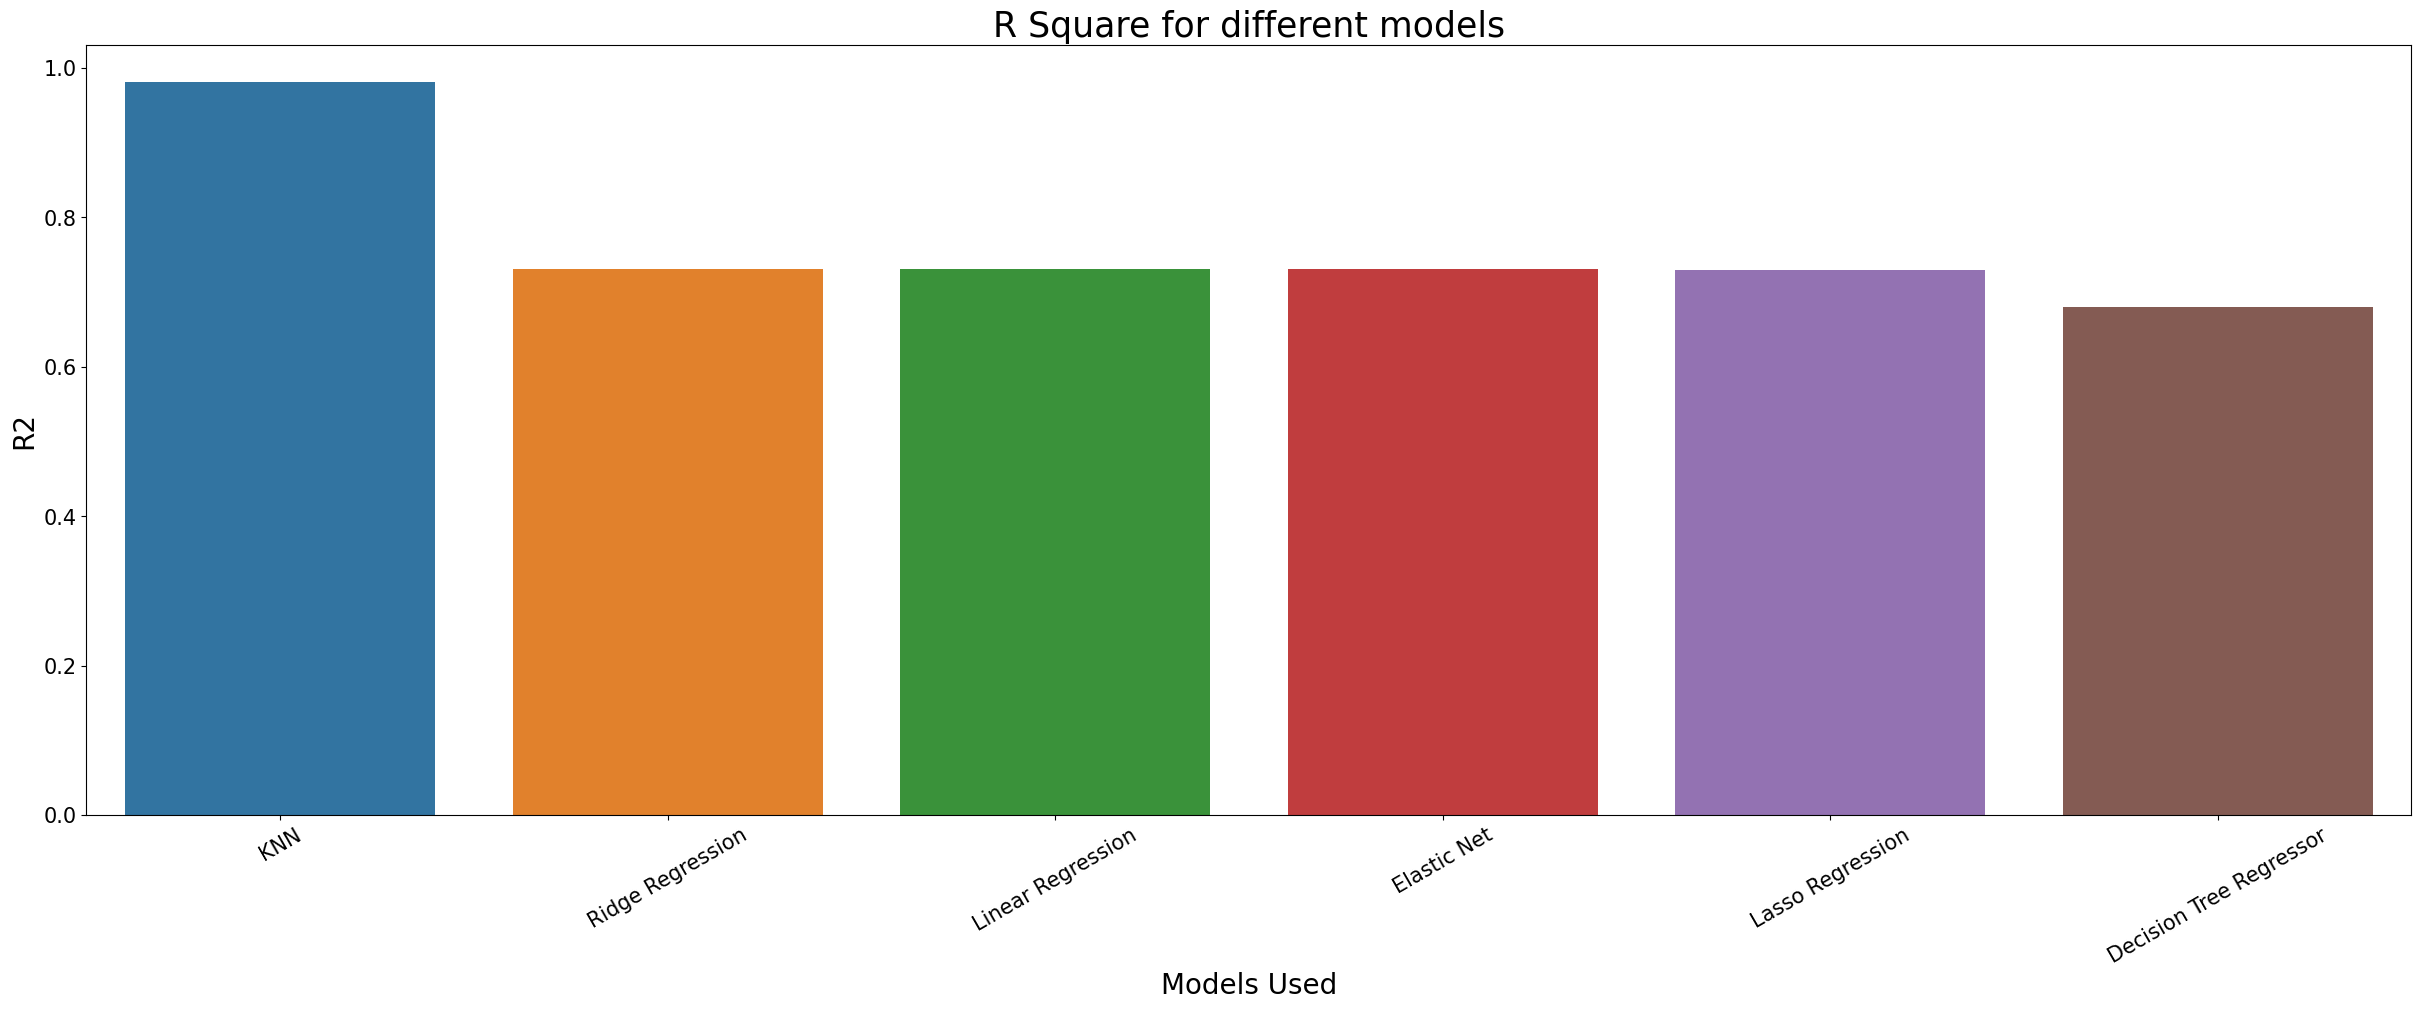

In [51]:
data = {'Linear Regression': r2_lin_reg, 'Ridge Regression': r2_ridge_reg, 'Lasso Regression': r2_las_reg, 
        'Elastic Net': r2_el_net, 'Decision Tree Regressor': r2_dtr, 'KNN': neigh_R2 }
data = dict(sorted(data.items(), key = lambda x: x[1], reverse = True))
models = list(data.keys())
R2 = list(data.values())
fig = plt.figure(figsize = (30, 10))
sns.barplot(x = models, y = R2)
plt.xlabel("Models Used", size = 20)
plt.xticks(rotation = 30, size = 15)
plt.ylabel("R2", size = 20)
plt.yticks(size = 15)
plt.title("R Square for different models", size = 25)
plt.show()

### Hyperparameter with KNN

In [52]:
# Try KNN hyperparametrs
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [53]:
gs = RandomizedSearchCV(KNeighborsRegressor(), grid_params, verbose = 1, cv=3, n_jobs = 6)

# fit the model on our train set
g_res = gs.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [54]:
# get the hyperparameters with the best score
g_res.best_params_

{'weights': 'distance', 'n_neighbors': 13, 'metric': 'manhattan'}

In [55]:
KNN_hyper = KNeighborsRegressor(n_neighbors = 13, weights = 'distance',
                                        metric = 'manhattan')
KNN_hyper.fit(X_train, y_train)

#Predicting 
y_pred = KNN_hyper.predict(X_test)

# calculating accuracy score
KNN_hyper_R2 =  metrics.r2_score(y_test, y_pred)
KNN_hyper_R2

0.9853101663021612

In this study, I Have tried different Models for Predicting permanent magnet synchronous motor(PMSM), AS we see that KNN model Have High accuracy with 95%.

That is way we use Hyperparametr over KNN and got 98%.